In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/playground-series-s4e12/sample_submission.csv
/kaggle/input/playground-series-s4e12/train.csv
/kaggle/input/playground-series-s4e12/test.csv


In [2]:
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor

import warnings
warnings.filterwarnings('ignore')

In [150]:
df = pd.read_csv("/kaggle/input/playground-series-s4e12/train.csv")
# df.head()

In [5]:
df_test = pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv")
# df_test.head()

In [ ]:
df.info()

In [ ]:
df.describe().round(1)

In [ ]:
# plt.plot(df['Age'].sort_values().reset_index(drop=True))

non_object_columns = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']

for non_object_column in non_object_columns:
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    sns.distplot(a=df[non_object_column])
    plt.subplot(1, 2, 2)
    sns.distplot(a=df_test[non_object_column])
    # plt.title(non_object_column)
    plt.show()

In [ ]:
df.isna().sum().sort_values(ascending=False)

In [ ]:
df_dropna = df.dropna().reset_index()

non_object_columns = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']

for non_object_column in non_object_columns:
    plt.figure(figsize=(15, 4))
    
    plt.subplot(1, 3, 1)
    sns.distplot(a=df[non_object_column])
    
    plt.subplot(1, 3, 2)
    sns.distplot(a=df_test[non_object_column])
    
    plt.subplot(1, 3, 3)
    sns.distplot(a=df_dropna[non_object_column])
    
    plt.show()

In [ ]:
# Previous Claims         364029 ------------- mean of above and below
# Occupation              358075 ------------- check test and train data
# Credit Score            137882 ------------- mean of above and below
# Number of Dependents    109672 ------------- mean of above and below
# Customer Feedback        77824 ------------- check test and train data
# Health Score             74076 ------------- mean of above and below
# Annual Income            44949 ------------- mean of above and below
# Age                      18705 ------------- mean of above and below
# Marital Status           18529 ------------- check test and train data
# Vehicle Age                  6 ------------- mean of above and below
# Insurance Duration           1 ------------- mode

In [ ]:
print(df.shape)
print(df_dropna.shape)
print(df_test.shape)

In [151]:
df1 = df.copy()
print(df1.shape)
df1.head()

(1200000, 21)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [152]:
df1.drop(['id', 'Policy Start Date'], axis=1, inplace=True)

In [ ]:
df1['Occupation'].unique()

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
df1['Occupation'].value_counts(dropna=False).plot(kind='bar', rot=0)
plt.subplot(1, 2, 2)
df_test['Occupation'].value_counts(dropna=False).plot(kind='bar', rot=0)
plt.show()

In [ ]:
(df1.groupby('Occupation', dropna=False)['Premium Amount'].mean()).plot(kind='bar', rot=0)

In [7]:
df1['Customer Feedback'].unique()

array(['Poor', 'Average', 'Good', nan], dtype=object)

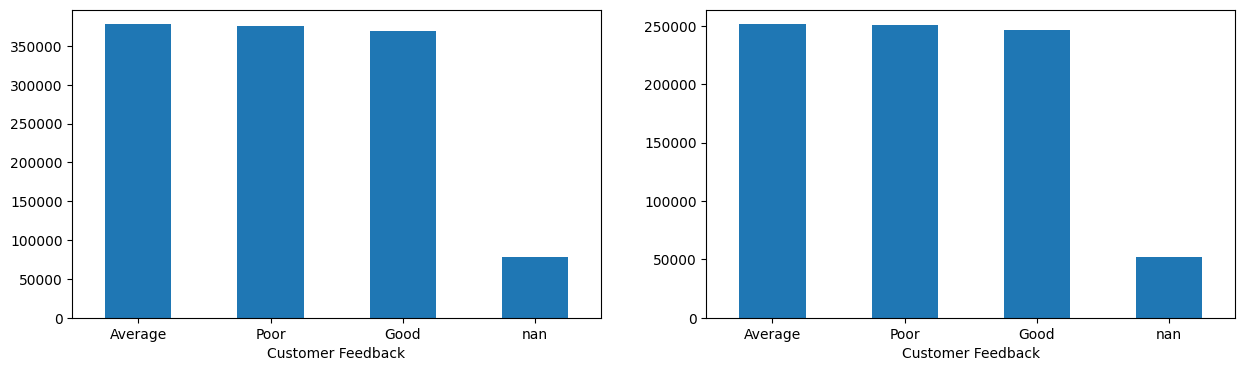

In [8]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
df1['Customer Feedback'].value_counts(dropna=False).plot(kind='bar', rot=0)
plt.subplot(1, 2, 2)
df_test['Customer Feedback'].value_counts(dropna=False).plot(kind='bar', rot=0)
plt.show()

<Axes: xlabel='Customer Feedback'>

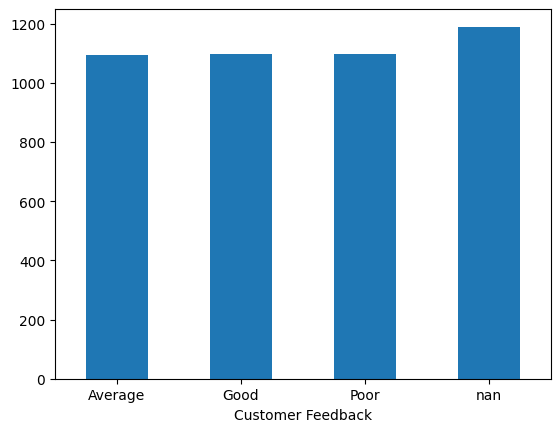

In [26]:
(df1.groupby('Customer Feedback', dropna=False)['Premium Amount'].mean()).plot(kind='bar', rot=0)

In [15]:
df1[df1['Customer Feedback'].isna()]['Premium Amount']

28          699.0
59         1624.0
60         2932.0
79          514.0
90           37.0
            ...  
1199911     240.0
1199917    3522.0
1199949    1721.0
1199966    1672.0
1199987     473.0
Name: Premium Amount, Length: 77824, dtype: float64

<Axes: xlabel='Premium Amount', ylabel='Density'>

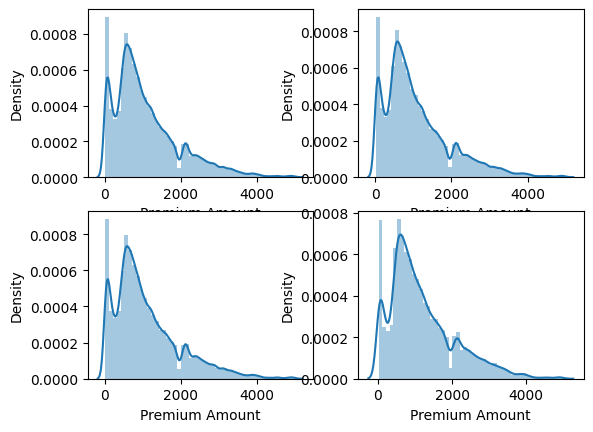

In [17]:
plt.subplot(2, 2, 1)
sns.distplot(a=(df1[df1['Customer Feedback'] == 'Average']['Premium Amount']))

plt.subplot(2, 2, 2)
sns.distplot(a=(df1[df1['Customer Feedback'] == 'Good']['Premium Amount']))

plt.subplot(2, 2, 3)
sns.distplot(a=(df1[df1['Customer Feedback'] == 'Poor']['Premium Amount']))

plt.subplot(2, 2, 4)
sns.distplot(a=(df1[df1['Customer Feedback'].isna()]['Premium Amount']))

{'whiskers': [<matplotlib.lines.Line2D at 0x7feadfc43190>,
 'caps': [<matplotlib.lines.Line2D at 0x7feadfc436d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7feadfc42ef0>],
 'medians': [<matplotlib.lines.Line2D at 0x7feadfc43c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x7feadfc43eb0>],
 'means': []}

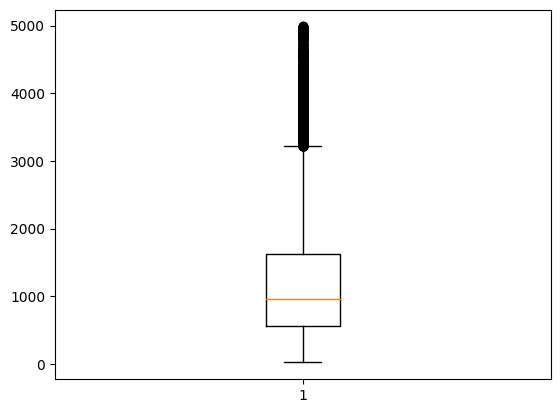

In [18]:
plt.boxplot(df1[df1['Customer Feedback'].isna()]['Premium Amount'])

In [ ]:
df1[df1['Customer Feedback'].isna()].isna().sum().sort_values(ascending=False)

In [27]:
df1['Customer Feedback'].isna().sum()

77824

In [28]:
df1['Marital Status'].unique()

array(['Married', 'Divorced', 'Single', nan], dtype=object)

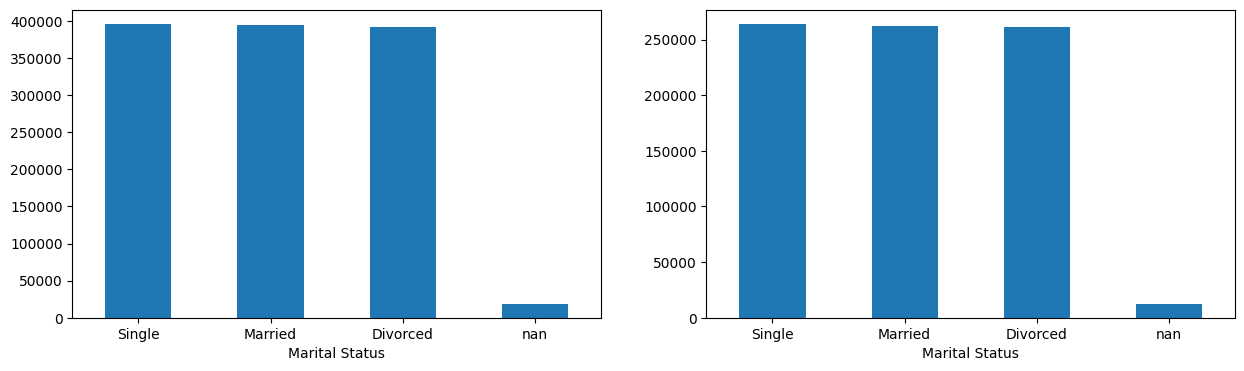

In [29]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
df1['Marital Status'].value_counts(dropna=False).plot(kind='bar', rot=0)
plt.subplot(1, 2, 2)
df_test['Marital Status'].value_counts(dropna=False).plot(kind='bar', rot=0)
plt.show()

<Axes: xlabel='Marital Status'>

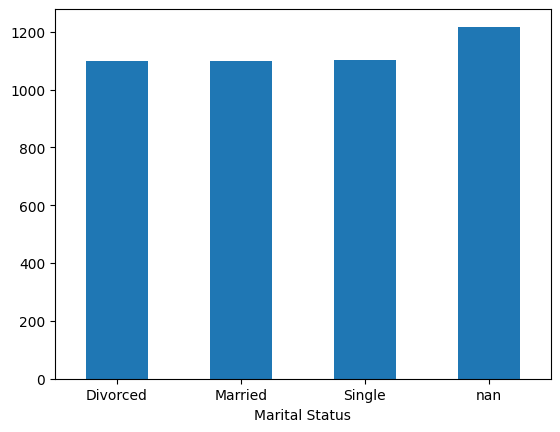

In [30]:
(df1.groupby('Marital Status', dropna=False)['Premium Amount'].mean()).plot(kind='bar', rot=0)

<Axes: xlabel='Premium Amount', ylabel='Density'>

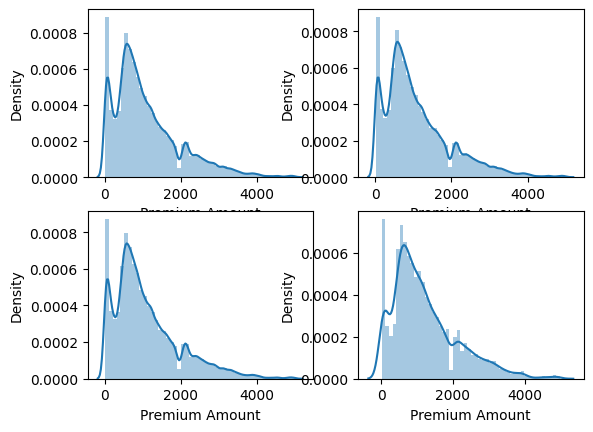

In [31]:
plt.subplot(2, 2, 1)
sns.distplot(a=(df1[df1['Marital Status'] == 'Divorced']['Premium Amount']))

plt.subplot(2, 2, 2)
sns.distplot(a=(df1[df1['Marital Status'] == 'Married']['Premium Amount']))

plt.subplot(2, 2, 3)
sns.distplot(a=(df1[df1['Marital Status'] == 'Single']['Premium Amount']))

plt.subplot(2, 2, 4)
sns.distplot(a=(df1[df1['Marital Status'].isna()]['Premium Amount']))

In [ ]:
df1[df1['Customer Feedback'].isna() | df1['Marital Status'].isna()].isna().sum().sort_values(ascending=False)

In [ ]:
df1.dropna(subset=['Customer Feedback','Marital Status'], inplace=True)
df1 = df1.reset_index().drop(['index', 'id'], axis=1)
df1

In [ ]:
plt.figure(figsize=(7, 8))
plt.subplot(2, 1, 1)
df1['Occupation'].value_counts(dropna=False).plot(kind='bar', rot=0)
plt.subplot(2, 1, 2)
(df1.groupby('Occupation', dropna=False)['Premium Amount'].mean()).plot(kind='bar', rot=0)
plt.show()

In [52]:
df1.isna().sum().sort_values(ascending=False)

Previous Claims         364029
Occupation              358075
Credit Score            137882
Number of Dependents    109672
Customer Feedback        77824
Health Score             74076
Annual Income            44949
Age                      18705
Marital Status           18529
Vehicle Age                  6
Insurance Duration           1
id                           0
Property Type                0
Exercise Frequency           0
Smoking Status               0
Policy Type                  0
Policy Start Date            0
Location                     0
Education Level              0
Gender                       0
Premium Amount               0
dtype: int64

In [ ]:
df1.select_dtypes("object")

In [ ]:
for i in df1.select_dtypes("object").columns:
    print(i, " "*(20-len(i)),df1[i].unique(), "\n")

In [ ]:
# Gender                     0 --------- 0 1
# Marital Status             0 --------- 0 1 OHE
# Education Level            0 --------- 0 1 OHE
# Occupation            329843 --------- 0 1 OHE
# Location                   0 --------- 0 1 OHE
# Policy Type                0 --------- -1 0 1
# Policy Start Date          0 --------- drop
# Customer Feedback          0 --------- -1 0 1
# Smoking Status             0 --------- 0 1
# Exercise Frequency         0 --------- 1 7 30
# Property Type              0 --------- 0 1 OHE

In [153]:
gender_dict = {'Female': 0,'Male': 1}
policy_type_dict = {'Basic': -1,'Premium': 0,'Comprehensive': 1}
# customer_feedback_dict = {'Poor': -1,'Average': 0,'Good': 1}
smoking_status_dict = {'No': 0,'Yes': 1}
exercise_frequency_dict = {'Rarely': 1, 'Daily':0, 'Weekly':1/7, 'Monthly': 1/30}

In [154]:
df1['Gender'] = df1['Gender'].map(gender_dict)
df1['Policy Type'] = df1['Policy Type'].map(policy_type_dict)
# df1['Customer Feedback'] = df1['Customer Feedback'].map(customer_feedback_dict)
df1['Smoking Status'] = df1['Smoking Status'].map(smoking_status_dict)
df1['Exercise Frequency'] = df1['Exercise Frequency'].map(exercise_frequency_dict)

In [51]:
pd.get_dummies(df1['Customer Feedback'], dtype = int)

,Average,Good,Poor
0,0,0,1
1,1,0,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
1199995,0,0,1
1199996,0,0,1
1199997,0,1,0
1199998,0,0,1


In [149]:
pd.get_dummies(df1['Marital Status'], dtype = int)

KeyError: 'Marital Status'

In [ ]:
pd.get_dummies(df1['Education Level'], dtype = int).drop(['PhD'], axis=1)

In [ ]:
pd.get_dummies(df1['Occupation'], dtype = int)

In [ ]:
pd.get_dummies(df1['Location'], dtype = int).drop(['Suburban'], axis=1)

In [ ]:
pd.get_dummies(df1['Property Type'], dtype = int).drop(['Condo'], axis=1)

In [ ]:
df1.drop(['Policy Start Date'], axis=1, inplace=True)
df1

In [155]:
df2 = pd.concat(
    [
        df1.select_dtypes(exclude = "object"),
        pd.get_dummies(df1['Marital Status'], dtype = int),
        pd.get_dummies(df1['Education Level'], dtype = int).drop(['PhD'], axis=1),
        pd.get_dummies(df1['Occupation'], dtype = int),
        pd.get_dummies(df1['Location'], dtype = int).drop(['Suburban'], axis=1),
        pd.get_dummies(df1['Property Type'], dtype = int).drop(['Condo'], axis=1),
        pd.get_dummies(df1['Customer Feedback'], dtype = int)
    ],
    axis = "columns"
)
df2

,Age,Gender,Annual Income,Number of Dependents,Health Score,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,...,Employed,Self-Employed,Unemployed,Rural,Urban,Apartment,House,Average,Good,Poor
0,19.0,0,10049.0,1.0,22.598761,0,2.0,17.0,372.0,5.0,...,0,1,0,0,1,0,1,0,0,1
1,39.0,0,31678.0,3.0,15.569731,1,1.0,12.0,694.0,2.0,...,0,0,0,1,0,0,1,1,0,0
2,23.0,1,25602.0,3.0,47.177549,0,1.0,14.0,NaN,3.0,...,0,1,0,0,0,0,1,0,1,0
3,21.0,1,141855.0,2.0,10.938144,-1,1.0,0.0,367.0,1.0,...,0,0,0,1,0,1,0,0,0,1
4,21.0,1,39651.0,1.0,20.376094,0,0.0,8.0,598.0,4.0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,0,27316.0,0.0,13.772907,0,NaN,5.0,372.0,3.0,...,0,0,1,0,1,1,0,0,0,1
1199996,54.0,1,35786.0,NaN,11.483482,1,NaN,10.0,597.0,4.0,...,0,1,0,1,0,1,0,0,0,1
1199997,19.0,1,51884.0,0.0,14.724469,-1,0.0,19.0,NaN,6.0,...,0,0,0,0,0,0,0,0,1,0
1199998,55.0,1,NaN,1.0,18.547381,0,1.0,7.0,407.0,4.0,...,0,0,0,0,0,1,0,0,0,1


In [156]:
df2.isna().sum().sort_values(ascending=False)

Previous Claims         364029
Credit Score            137882
Number of Dependents    109672
Health Score             74076
Annual Income            44949
Age                      18705
Vehicle Age                  6
Insurance Duration           1
Good                         0
Master's                     0
Average                      0
House                        0
Apartment                    0
Urban                        0
Rural                        0
Unemployed                   0
Self-Employed                0
Employed                     0
Married                      0
High School                  0
Bachelor's                   0
Single                       0
Gender                       0
Divorced                     0
Premium Amount               0
Exercise Frequency           0
Smoking Status               0
Policy Type                  0
Poor                         0
dtype: int64

In [ ]:
def fill_nan_with_neighbors(series):
    for i in range(1, len(series) - 1):
        if pd.isna(series.iloc[i]):
            prev_value = series.iloc[i - 1]
            next_value = series.iloc[i + 1]
            if not pd.isna(prev_value) and not pd.isna(next_value):
                series.iloc[i] = (prev_value + next_value) / 2
    return series

In [ ]:
# Previous Claims         364029 ------------- mean of above and below
# Occupation              358075 ------------- check test and train data
# Credit Score            137882 ------------- mean of above and below
# Number of Dependents    109672 ------------- mean of above and below
# Customer Feedback        77824 ------------- check test and train data
# Health Score             74076 ------------- mean of above and below
# Annual Income            44949 ------------- mean of above and below
# Age                      18705 ------------- mean of above and below
# Marital Status           18529 ------------- check test and train data
# Vehicle Age                  6 ------------- mean of above and below
# Insurance Duration           1 ------------- mode

In [ ]:
df2['Previous Claims'] = fill_nan_with_neighbors(df2['Previous Claims'])
df2['Credit Score'] = fill_nan_with_neighbors(df2['Credit Score'])
df2['Number of Dependents'] = fill_nan_with_neighbors(df2['Number of Dependents'])
df2['Health Score'] = fill_nan_with_neighbors(df2['Health Score'])
df2['Annual Income'] = fill_nan_with_neighbors(df2['Annual Income'])
df2['Age'] = fill_nan_with_neighbors(df2['Age'])
df2['Vehicle Age'].fillna(df2['Vehicle Age'].mean(), inplace=True)
df2['Insurance Duration'].fillna(df2['Insurance Duration'].mode()[0], inplace=True)

In [157]:
df2.fillna(df2.mean().to_dict(), inplace=True)

In [158]:
df2

,Age,Gender,Annual Income,Number of Dependents,Health Score,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,...,Employed,Self-Employed,Unemployed,Rural,Urban,Apartment,House,Average,Good,Poor
0,19.0,0,10049.000000,1.000000,22.598761,0,2.000000,17.0,372.00000,5.0,...,0,1,0,0,1,0,1,0,0,1
1,39.0,0,31678.000000,3.000000,15.569731,1,1.000000,12.0,694.00000,2.0,...,0,0,0,1,0,0,1,1,0,0
2,23.0,1,25602.000000,3.000000,47.177549,0,1.000000,14.0,592.92435,3.0,...,0,1,0,0,0,0,1,0,1,0
3,21.0,1,141855.000000,2.000000,10.938144,-1,1.000000,0.0,367.00000,1.0,...,0,0,0,1,0,1,0,0,0,1
4,21.0,1,39651.000000,1.000000,20.376094,0,0.000000,8.0,598.00000,4.0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,0,27316.000000,0.000000,13.772907,0,1.002689,5.0,372.00000,3.0,...,0,0,1,0,1,1,0,0,0,1
1199996,54.0,1,35786.000000,2.009934,11.483482,1,1.002689,10.0,597.00000,4.0,...,0,1,0,1,0,1,0,0,0,1
1199997,19.0,1,51884.000000,0.000000,14.724469,-1,0.000000,19.0,592.92435,6.0,...,0,0,0,0,0,0,0,0,1,0
1199998,55.0,1,32745.217777,1.000000,18.547381,0,1.000000,7.0,407.00000,4.0,...,0,0,0,0,0,1,0,0,0,1


In [159]:
df2.isna().sum()

Age                     0
Gender                  0
Annual Income           0
Number of Dependents    0
Health Score            0
Policy Type             0
Previous Claims         0
Vehicle Age             0
Credit Score            0
Insurance Duration      0
Smoking Status          0
Exercise Frequency      0
Premium Amount          0
Divorced                0
Married                 0
Single                  0
Bachelor's              0
High School             0
Master's                0
Employed                0
Self-Employed           0
Unemployed              0
Rural                   0
Urban                   0
Apartment               0
House                   0
Average                 0
Good                    0
Poor                    0
dtype: int64

In [160]:
df2.to_csv("train_new.csv", index=False)

In [ ]:
sns.heatmap(df.isna().sort_values(by=["Occupation"]) == True)

In [ ]:
for non_object_column in df.select_dtypes(exclude = "object").columns:
    print(df[non_object_column].mean())

In [ ]:
for non_object_column in df.select_dtypes(exclude = "object").columns:
    if non_object_column != 'id':
        print(df[non_object_column].mode()[0])

In [ ]:
df['Age'].mode()[0]

In [ ]:
# df.dropna(inplace = True)
for non_object_column in df.select_dtypes(exclude = "object").columns:
    df[non_object_column].fillna(df[non_object_column].mode()[0], inplace = True)

df.dropna(inplace = True)

In [ ]:
df.shape

In [ ]:
fig, ax = plt.subplots(figsize=(15, 8))
sns.heatmap(df.select_dtypes(exclude = "object").corr(), annot = True, cmap = "Reds")

In [ ]:
df_categorical = df.select_dtypes('object')
for object_column in df_categorical.columns:
    print(object_column, {df[object_column].nunique()}, ': ', df[object_column].unique(), '\n')

In [ ]:
df.drop(['id', 'Policy Start Date'], axis = 1, inplace = True)

In [ ]:
for non_object_column in df.select_dtypes(exclude = "object").columns:
    if non_object_column != 'Premium Amount':
        df[non_object_column] = df[non_object_column] / df[non_object_column].max()

In [ ]:
df.head()

In [ ]:
df["Policy Start Date"] = pd.to_datetime(df["Policy Start Date"].apply(lambda x: x[:10]))

In [ ]:
pd.get_dummies(df_categorical, drop_first = True, dtype = int)

In [ ]:
df = pd.concat(
    [
        df.select_dtypes(exclude = "object"), 
        pd.get_dummies(df.select_dtypes('object'), drop_first = True, dtype = int)
    ],
    axis = "columns"
)
df.head()

In [ ]:
df.to_csv("train_new.csv", index=False)

In [ ]:
df = pd.read_csv("/kaggle/working/train_new.csv")

In [ ]:
df.dtypes

In [ ]:
df.describe()

In [ ]:
plt.boxplot(df['Premium Amount'])

In [ ]:
plt.boxplot(df['Annual Income'])

In [ ]:
plt.boxplot(df['Previous Claims'])

In [ ]:
df[df['Previous Claims'] > 2]['Age'].count()

In [ ]:
df[df['Annual Income'] > 100_000]['Age'].count()

In [ ]:
df[(df['Previous Claims'] > 2) | (df['Annual Income'] > 100_000) | (df['Premium Amount'] > 3000)]['Age'].count()

In [ ]:
df['Age'].count()

In [ ]:
df2 = df[(df['Previous Claims'] > 2) | (df['Annual Income'] > 100_000) | (df['Premium Amount'] > 3_000)]
df2['Age'].count()

In [ ]:
df = df[(df['Previous Claims'] <= 5) & (df['Annual Income'] <= 100_000) & (df['Premium Amount'] <= 3000)]
df['Age'].count()

In [161]:
df = df2.copy()
x = df.drop(['Premium Amount'], axis = 1)
y = df['Premium Amount']

In [162]:
df

,Age,Gender,Annual Income,Number of Dependents,Health Score,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,...,Employed,Self-Employed,Unemployed,Rural,Urban,Apartment,House,Average,Good,Poor
0,19.0,0,10049.000000,1.000000,22.598761,0,2.000000,17.0,372.00000,5.0,...,0,1,0,0,1,0,1,0,0,1
1,39.0,0,31678.000000,3.000000,15.569731,1,1.000000,12.0,694.00000,2.0,...,0,0,0,1,0,0,1,1,0,0
2,23.0,1,25602.000000,3.000000,47.177549,0,1.000000,14.0,592.92435,3.0,...,0,1,0,0,0,0,1,0,1,0
3,21.0,1,141855.000000,2.000000,10.938144,-1,1.000000,0.0,367.00000,1.0,...,0,0,0,1,0,1,0,0,0,1
4,21.0,1,39651.000000,1.000000,20.376094,0,0.000000,8.0,598.00000,4.0,...,0,1,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1199995,36.0,0,27316.000000,0.000000,13.772907,0,1.002689,5.0,372.00000,3.0,...,0,0,1,0,1,1,0,0,0,1
1199996,54.0,1,35786.000000,2.009934,11.483482,1,1.002689,10.0,597.00000,4.0,...,0,1,0,1,0,1,0,0,0,1
1199997,19.0,1,51884.000000,0.000000,14.724469,-1,0.000000,19.0,592.92435,6.0,...,0,0,0,0,0,0,0,0,1,0
1199998,55.0,1,32745.217777,1.000000,18.547381,0,1.000000,7.0,407.00000,4.0,...,0,0,0,0,0,1,0,0,0,1


In [163]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [164]:
model1 = LinearRegression()
model2 = RandomForestRegressor(n_estimators=10, max_depth=30, random_state=0)
model3 = PolynomialFeatures(degree=4)
model4 = CatBoostRegressor(
                            # iterations=1000,
                            learning_rate=0.01,
                            depth = 10,
                            n_estimators = 1000,
                            verbose = False
)
model4_2 = CatBoostRegressor(
                            # iterations=1000,
                            learning_rate=0.01,
                            depth = 7,
                            n_estimators = 1000,
                            verbose = False
)

In [ ]:
x_train = model3.fit_transform(x_train)
x_test = model3.fit_transform(x_test)
x = model3.fit_transform(x)

In [165]:
# model = model3
# model.fit(model3.fit_transform(x_train))

# model = model1
# model.fit(model3.fit(model3.fit_transform(x_train)), y_train)

model = model4
model.fit(x_train, y_train)

In [166]:
y_pred = model.predict(x_test).round(3)

In [167]:
def rmsle(predictions, targets):
    """Calculate the root mean squared logarithmic error between predictions and targets"""
    return np.sqrt(np.mean((np.log(predictions + 1) - np.log(targets + 1)) ** 2))

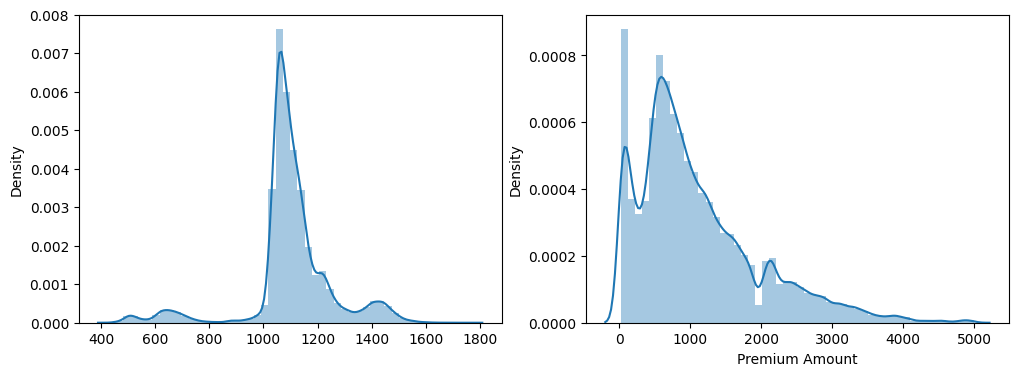

<Axes: xlabel='value', ylabel='Density'>

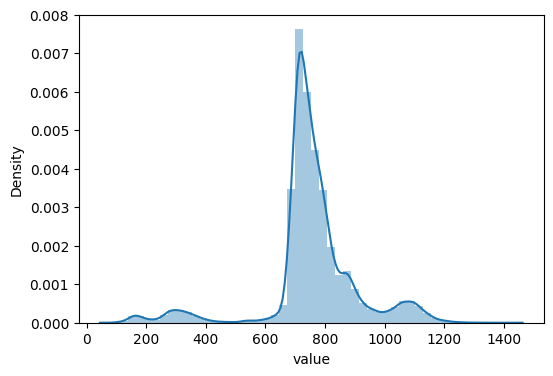

In [182]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.distplot(a=y_pred)

plt.subplot(1, 2, 2)
sns.distplot(a=y_test)
plt.show()


plt.figure(figsize=(6, 4))
sns.distplot(a = pd.DataFrame({'value': y_pred})['value'].apply(lambda x: x-345))

In [169]:
df_pred = pd.DataFrame([y_pred, y_test]).transpose()
df_pred = df_pred.describe()
df_pred['diff'] = df_pred[0] - df_pred[1]
df_pred['0/1'] = df_pred[0] / df_pred[1]
df_pred

,0,1,diff,0/1
count,240000.000000,240000.000000,0.000000,1.000000
mean,1102.710144,1102.194108,0.516036,1.000468
std,157.915165,865.625451,-707.710286,0.182429
min,428.639000,20.000000,408.639000,21.431950
25%,1055.824750,514.000000,541.824750,2.054134
50%,1091.885000,871.000000,220.885000,1.253599
75%,1151.910250,1512.000000,-360.089750,0.761845
max,1769.108000,4999.000000,-3229.892000,0.353892


In [170]:
rmsle(y_pred, y_test)

1.1449985245849912

In [181]:
rmsle(y_pred-345, y_test)

1.068265945521392

In [107]:
pred_max = y_pred.max()
pred_min = y_pred.min()

# -400 to +3000
diff_array = np.linspace(-400, 3000, num=len(y_pred))
diff_array

array([-400.        , -399.98583327, -399.97166655, ..., 2999.97166655,
       2999.98583327, 3000.        ])

In [108]:
df_pred = pd.DataFrame(y_pred, columns=['value'])

In [110]:
for i in df_pred.sort_values(by='value').index:
    df_pred.iloc[i] = df_pred.iloc[i] + diff_array[i]
df_pred

,value
0,744.169000
1,667.394167
2,639.218333
3,744.442500
4,818.065667
...,...
239995,4045.491333
239996,4210.465500
239997,4086.372667
239998,4094.740833


In [112]:
rmsle(df_pred['value'], y_test)

1.6224878955065836

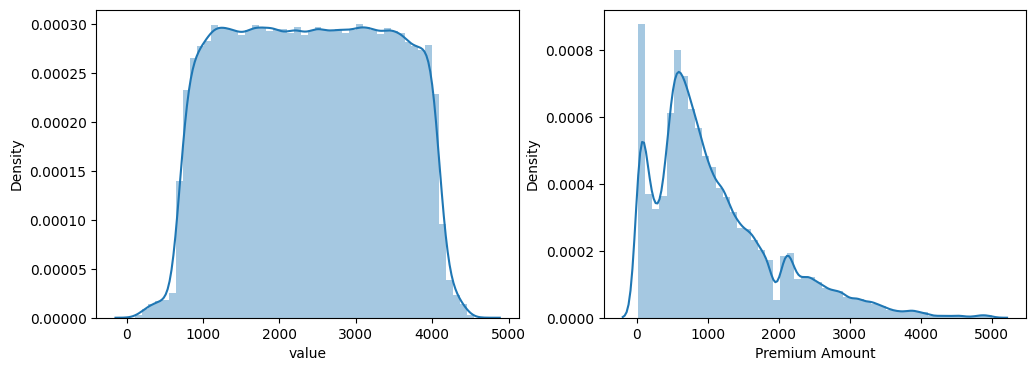

In [113]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
sns.distplot(a=df_pred['value'])

plt.subplot(1, 2, 2)
sns.distplot(a=y_test)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5), sharey=True)
plt.subplot(1, 2, 1)
plt.plot(df_pred[0][:1000])
plt.subplot(1, 2, 2)
plt.plot(df_pred[1][:1000])

In [ ]:
plt.figure(figsize=(15, 4))
plt.subplot(1, 2, 1)
sns.distplot(a=y_pred-10)
plt.subplot(1, 2, 2)
sns.distplot(a=y_test)
plt.show()

In [184]:
model.fit(x, y)

In [192]:
df_test = pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv")

df_test['Gender'] = df_test['Gender'].map(gender_dict)
df_test['Policy Type'] = df_test['Policy Type'].map(policy_type_dict)
# df_test['Customer Feedback'] = df_test['Customer Feedback'].map(customer_feedback_dict)
df_test['Smoking Status'] = df_test['Smoking Status'].map(smoking_status_dict)
df_test['Exercise Frequency'] = df_test['Exercise Frequency'].map(exercise_frequency_dict)

df_test.drop(['Policy Start Date', 'id'], axis=1, inplace=True)

df_test = pd.concat(
    [
        df_test.select_dtypes(exclude = "object"),
        pd.get_dummies(df_test['Marital Status'], dtype = int),
        pd.get_dummies(df_test['Education Level'], dtype = int).drop(['PhD'], axis=1),
        pd.get_dummies(df_test['Occupation'], dtype = int),
        pd.get_dummies(df_test['Location'], dtype = int).drop(['Suburban'], axis=1),
        pd.get_dummies(df_test['Property Type'], dtype = int).drop(['Condo'], axis=1),
        pd.get_dummies(df_test['Customer Feedback'], dtype = int)
    ],
    axis = "columns"
)

df_test.fillna(df_test.mean().to_dict(), inplace=True)

# df_test.isna().sum()

Y_pred_test = model.predict(df_test)

In [193]:
df_test.shape

(800000, 28)

In [ ]:
df_test = pd.read_csv("/kaggle/input/playground-series-s4e12/test.csv")

# for non_object_column in df_test.select_dtypes(exclude = "object").columns:
#     df_test[non_object_column] = df_test[non_object_column] / df_test[non_object_column].max()

for non_object_column in df_test.select_dtypes(exclude = "object").columns:
    df_test[non_object_column].fillna(df_test[non_object_column].mean(), inplace = True)

df_test["Policy Start Date"] = pd.to_datetime(df_test["Policy Start Date"].apply(lambda x: x[:10]))

df_test = pd.concat(
    [
        df_test.select_dtypes(exclude = "object"), 
        pd.get_dummies(df_test.select_dtypes('object'), drop_first = True, dtype = int)
    ],
    axis = "columns"
)

x_df_test = df_test.drop(['id', 'Policy Start Date'], axis = 1)

x2_df_test = x_df_test[(x_df_test['Previous Claims'] > 2) | (x_df_test['Annual Income'] > 100_000)]

# x_df_test = x_df_test[(x_df_test['Previous Claims'] <= 2) & (x_df_test['Annual Income'] <= 100_000)]

print(x_df_test.shape)
print(x2_df_test.shape)
x_df_test.head()

In [ ]:
df_test[(df_test['Previous Claims'] > 2) | (df_test['Annual Income'] > 100_000)]['Age'].count()

In [ ]:
Y_pred_test = model.predict(x_df_test)

In [ ]:
x2 = df2.drop(['Premium Amount'], axis = 1)
y2 = df2['Premium Amount']
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size = 0.2, random_state = 1)
model_2 = model4_2
model_2.fit(x2_train, y2_train)
y2_pred = model_2.predict(x2_test)

df2_pred = pd.DataFrame([y2_pred, y2_test]).transpose()
df2_pred = df2_pred.describe()
df2_pred['diff'] = df2_pred[0] - df2_pred[1]
df2_pred['0/1'] = df2_pred[0] / df2_pred[1]
df2_pred

In [ ]:
print(rmsle(y2_pred, y2_test))

In [ ]:
print(rmsle(y2_pred-401.5, y2_test))

In [ ]:
model4_2 = CatBoostRegressor(
                            # iterations=1000,
                            learning_rate=0.01,
                            depth = 9,
                            n_estimators = 1000,
                            verbose = False
)
model_2 = model4_2
model_2.fit(x2, y2)

In [ ]:
Y2_pred_test = model_2.predict(x2_df_test)

In [ ]:
Y_pred_test.size + Y2_pred_test.size

In [194]:
df_sub = pd.read_csv("/kaggle/input/playground-series-s4e12/sample_submission.csv")
df_sub.head()

,id,Premium Amount
0,1200000,1102.545
1,1200001,1102.545
2,1200002,1102.545
3,1200003,1102.545
4,1200004,1102.545


In [195]:
df_sub['Premium Amount'] = Y_pred_test.round(3)
df_sub.to_csv("submissions1.csv", index=False)

In [ ]:
Y_pred_test = Y_pred_test - 100

# Y2_pred_test = Y2_pred_test - 401.5

In [ ]:
x_df_test['Prediction'] = Y_pred_test

x2_df_test['Prediction'] = Y2_pred_test

Y_pred_test_result = pd.concat([x_df_test, x2_df_test], axis = 'rows')['Prediction'].sort_index()

In [ ]:
Y_pred_test_result.size

In [186]:
df_test['Premium Amount'] = Y_pred_test.round(3)
df_submission = df_test[['id', 'Premium Amount']]

print(df_submission.shape)
df_submission.head()

KeyError: "['id'] not in index"

In [ ]:
df_submission.to_csv("submissions1.csv", index=False)

In [ ]:
df = df.sort_values(by='Premium Amount').reset_index(drop=True)
df

In [ ]:
plt.plot(df['Premium Amount'])